In [19]:
import matplotlib.pyplot as plt
import json
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


def plot(data, title):
        temperature = data
        fig = plt.figure(figsize=(20,9))
        map = Basemap(projection='cyl', resolution = 'i', area_thresh = 0.3, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90.0, anchor = 'SW')
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-90,90,15.0),labels=[1,1,0,1])
        map.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1])

        # temperature2 = upscale(temperature, fig)
        heatmap = plt.pcolormesh(
            np.linspace(-180, 180, num = temperature.shape[1]+1),
            np.linspace(-90, 90, num = temperature.shape[0]+1),
            temperature, 
            cmap='bwr',
            shading='flat'
        )
        # heatmap = plt.pcolormesh(
        #     np.linspace(-180, 180, num = temperature.shape[1]),
        #     np.linspace(-90, 90, num = temperature.shape[0]),
        #     temperature, 
        #     cmap='bwr',
        #     shading='nearest'
        # )
        map.colorbar(heatmap, pad=1)
        plt.title(title, 
            {
                'fontsize' : 30
            }
        )
        fig.show()

def report(data, i, plot_mask=[True, True, True]):
    data = data[i]
    output = np.array(data['output']).squeeze()
    input = np.array(data['input']).squeeze()
    prediction = np.array(data['prediction']).squeeze()

    # Need to figure out which input is which, since input.shape will be (X, 32, 64)

    print(output.shape)
    print(input.shape)

    if input.shape != (32, 64):
        input = input[0].squeeze() 
        print(input.shape)

    print('INFO:')
    table = [
        ['input variables', data['variables']],
        ['output variables', data['out_variables']],
        ['lead time', data['lead_times']],
        ['climate model', data['climate_model_init']],
        ['days since 1850', data['days_since_1850']],
    ]
    print(tabulate(table, tablefmt = "heavy_grid"))
    print()
    print('METRICS:')
    for i in data['metrics']:
        print(i)
        print(tabulate([[j, data['metrics'][i][j]] for j in data['metrics'][i]], tablefmt = "rounded_grid"))

    if plot_mask[0]: plot(input, 'Input')
    if plot_mask[1]: plot(prediction, 'Prediction')
    if plot_mask[2]: plot(output, 'Expected Output')
    print()

(32, 64)
(32, 64)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature']  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.05999999865889549 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                     ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0             ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━┛

METRICS:
lat_weighted_mse_val
╭──────────────────────────────┬─────────╮
│ w_mse_2m_temperature_1_hours │ 0.30729 │
├──────────────────────────────┼─────────┤
│ w_mse                        │ 0.30729 │
╰──────────────────────────────┴─────────╯
lat_weighted_rmse
╭───────────────────────────────┬─────────╮
│ w_rmse_2m_temperature_1_hours │ 11.7813 │
├───────────────────────────────┼─────────┤
│ w_rmse                        │ 11.7813 │
╰───────────────────────────────┴─────────╯
lat_weighted_acc
╭─

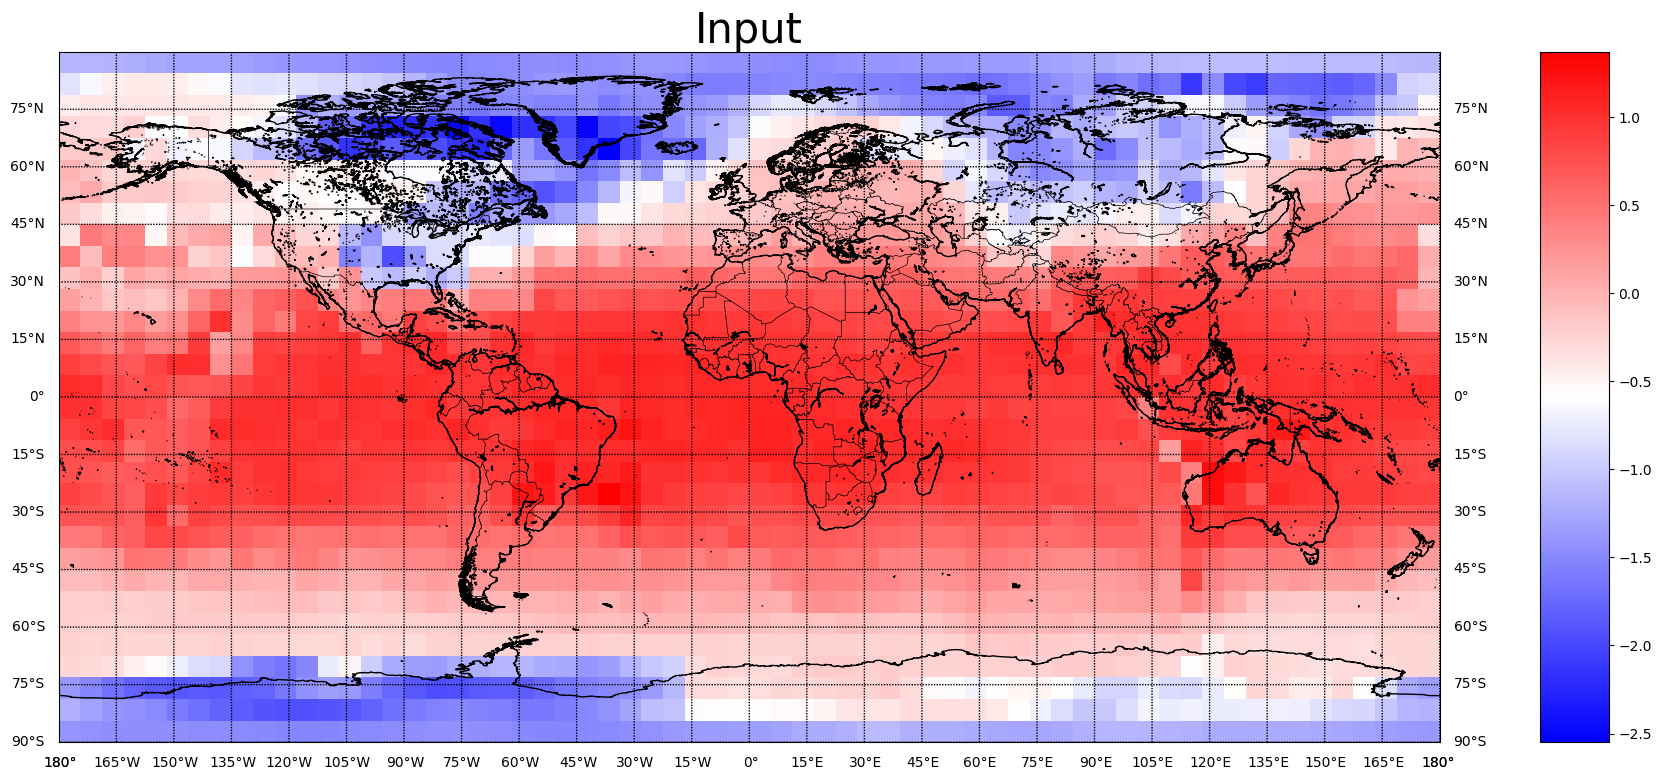

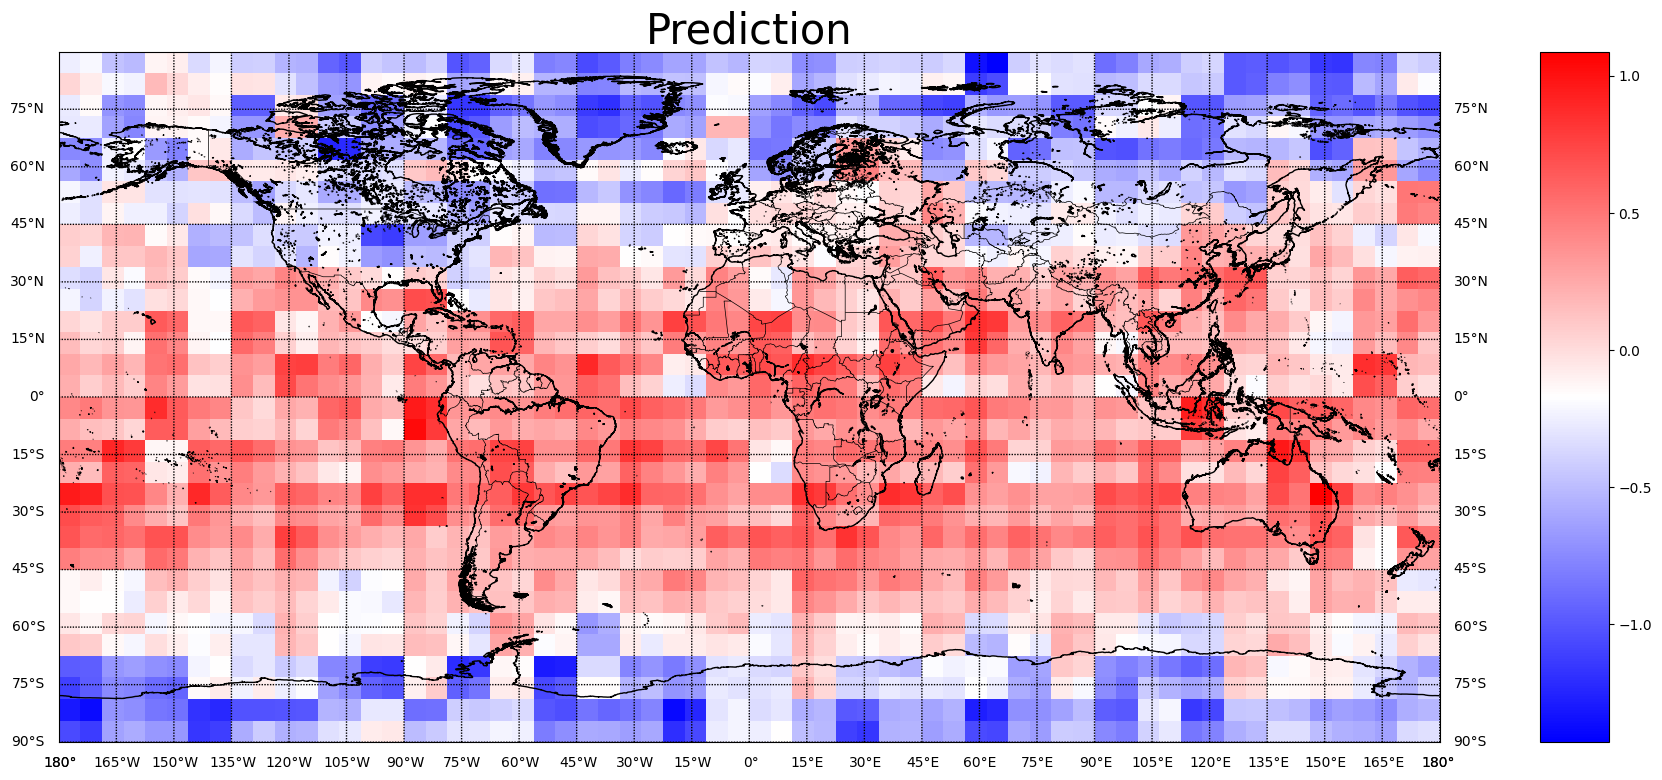

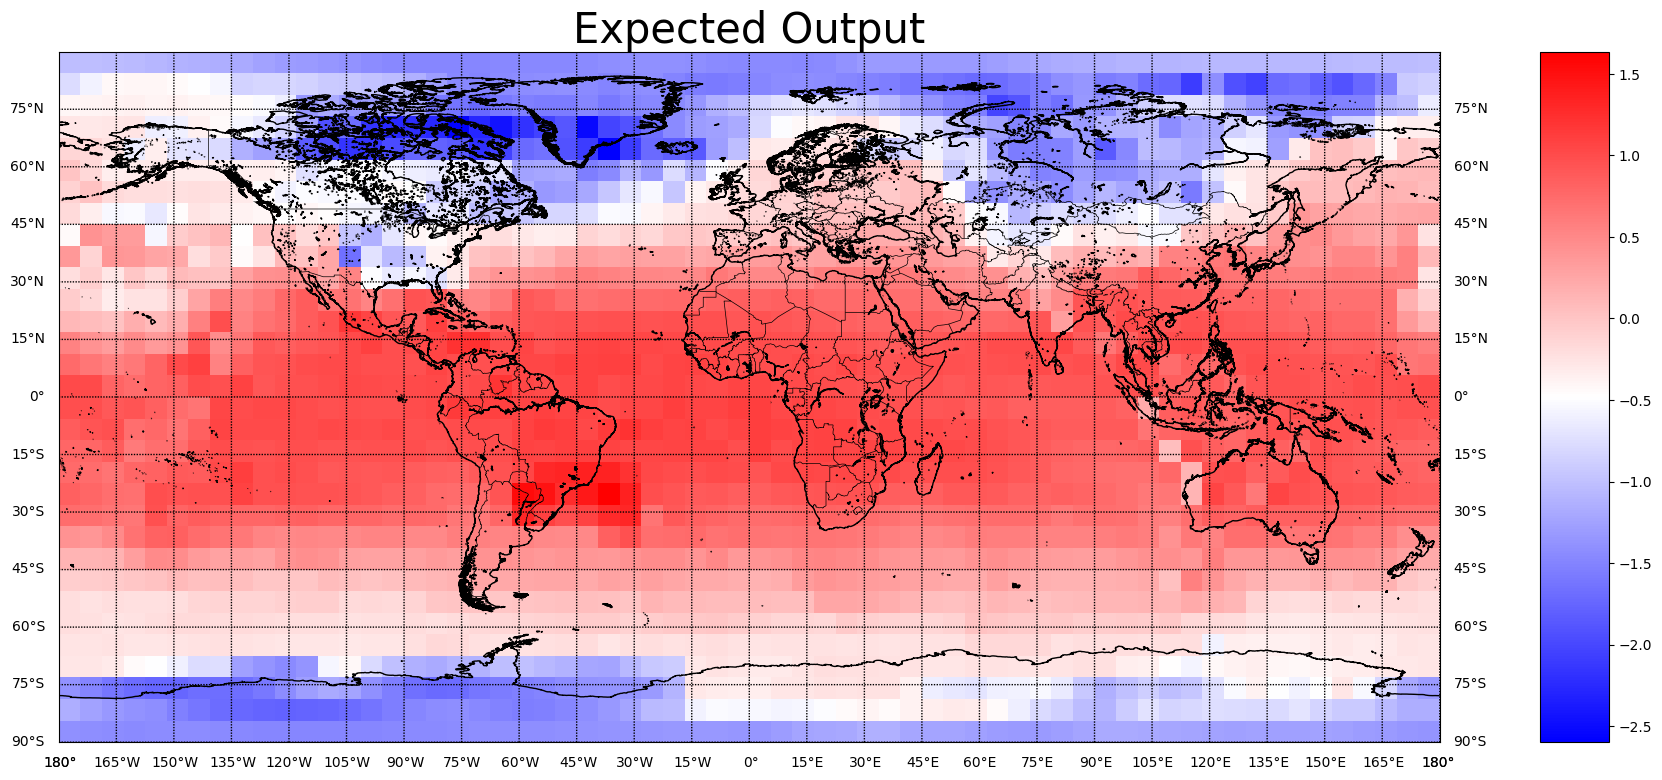

In [17]:
with open(r'/home/advit/aug29_exps/final_invars_1_hrs_0006.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0)

(32, 64)
(2, 32, 64)
(32, 64)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature', '10m_u_component_of_wind'] ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']                            ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.05999999865889549                           ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                                               ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0                                       ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

METRICS:
lat_weighted_mse_val
╭──────────────────────────────┬──────────╮
│ w_mse_2m_temperature_1_hours │ 0.719592 │
├──────────────────────────────┼──────────┤
│ w_mse                        │ 0.719592 

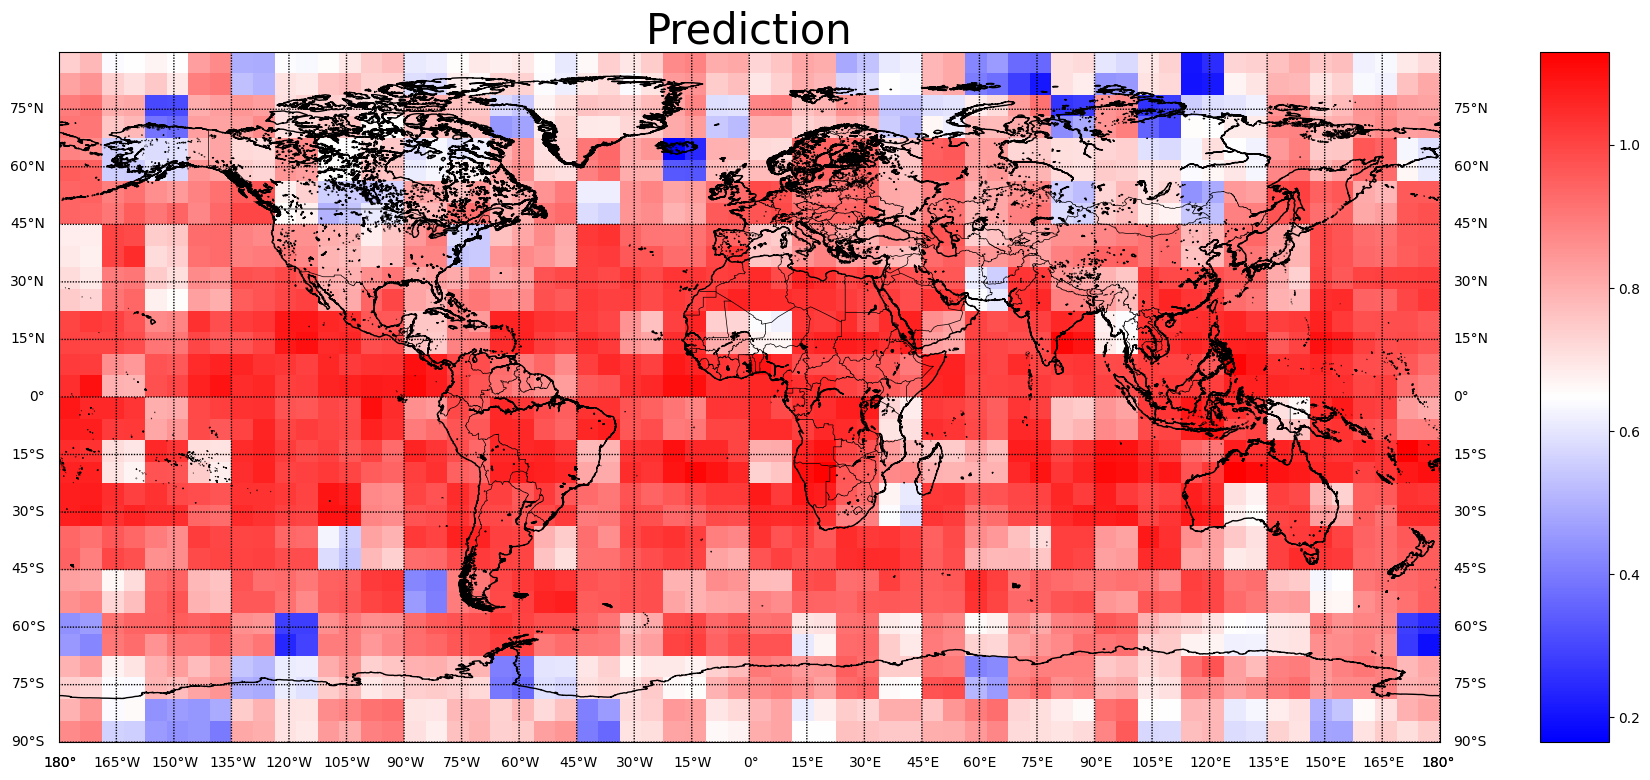

In [20]:
with open(r'/home/advit/aug29_exps/final_invars_2_hrs_0006.json', 'r') as f:
    data2 = json.load(f)
report(data2, 0, plot_mask=[False, True, False])

(32, 64)
(3, 32, 64)
(32, 64)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind'] ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']                                                       ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.05999999865889549                                                      ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                                                                          ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0                                                                  ┃
┗━━━

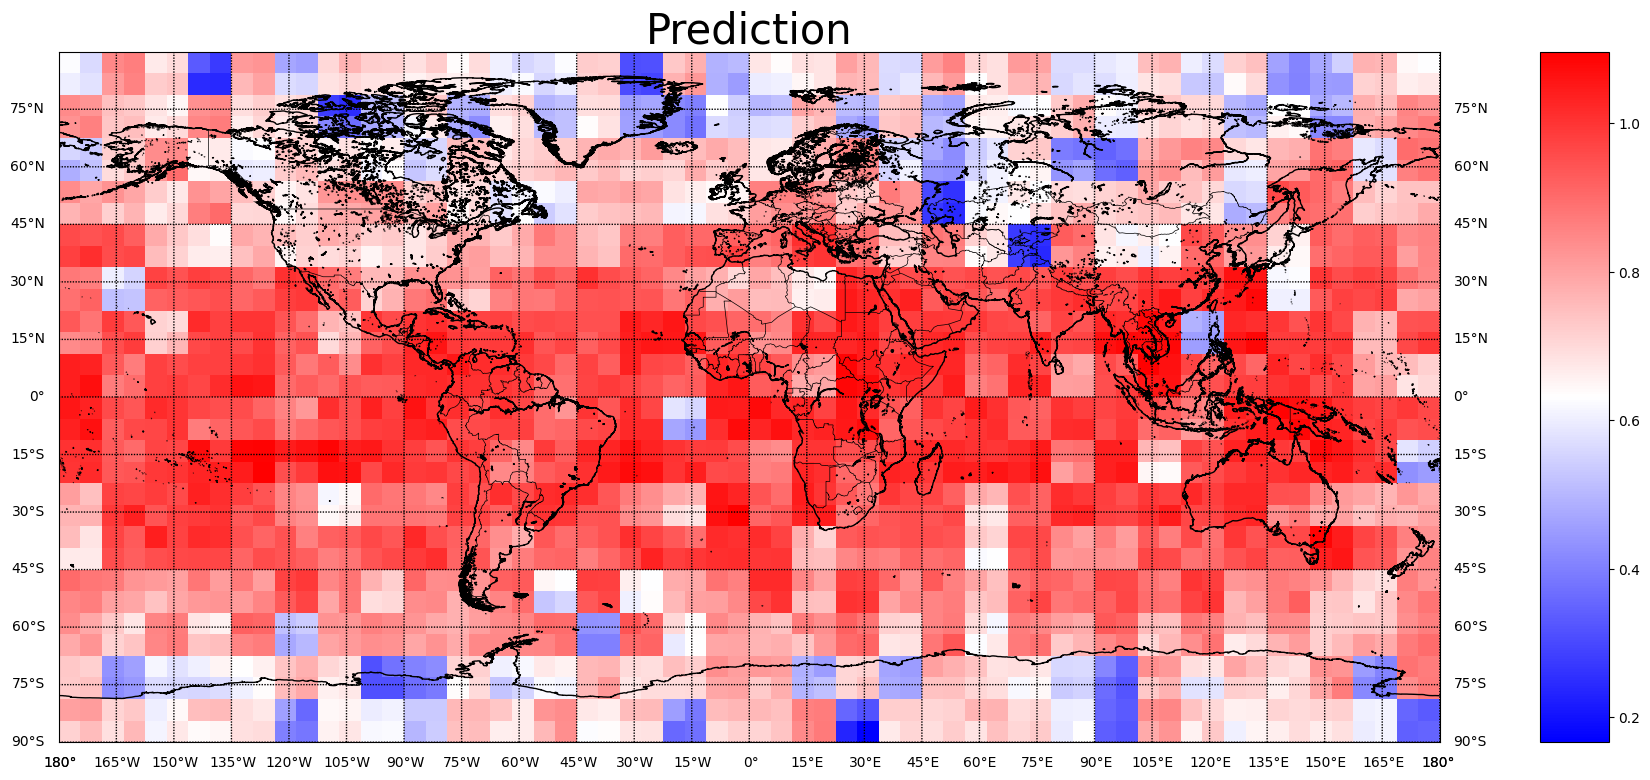

In [21]:
with open(r'/home/advit/aug29_exps/final_invars_3_hrs_0006.json', 'r') as f:
    data2 = json.load(f)
report(data2, 0, plot_mask=[False, True, False])

(32, 64)
(32, 64)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature']  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.05999999865889549 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                     ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0             ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━┛

METRICS:
lat_weighted_mse_val
╭──────────────────────────────┬──────────╮
│ w_mse_2m_temperature_1_hours │ 0.431897 │
├──────────────────────────────┼──────────┤
│ w_mse                        │ 0.431897 │
╰──────────────────────────────┴──────────╯
lat_weighted_rmse
╭───────────────────────────────┬─────────╮
│ w_rmse_2m_temperature_1_hours │ 13.9672 │
├───────────────────────────────┼─────────┤
│ w_rmse                        │ 13.9672 │
╰───────────────────────────────┴─────────╯
lat_weighted_a

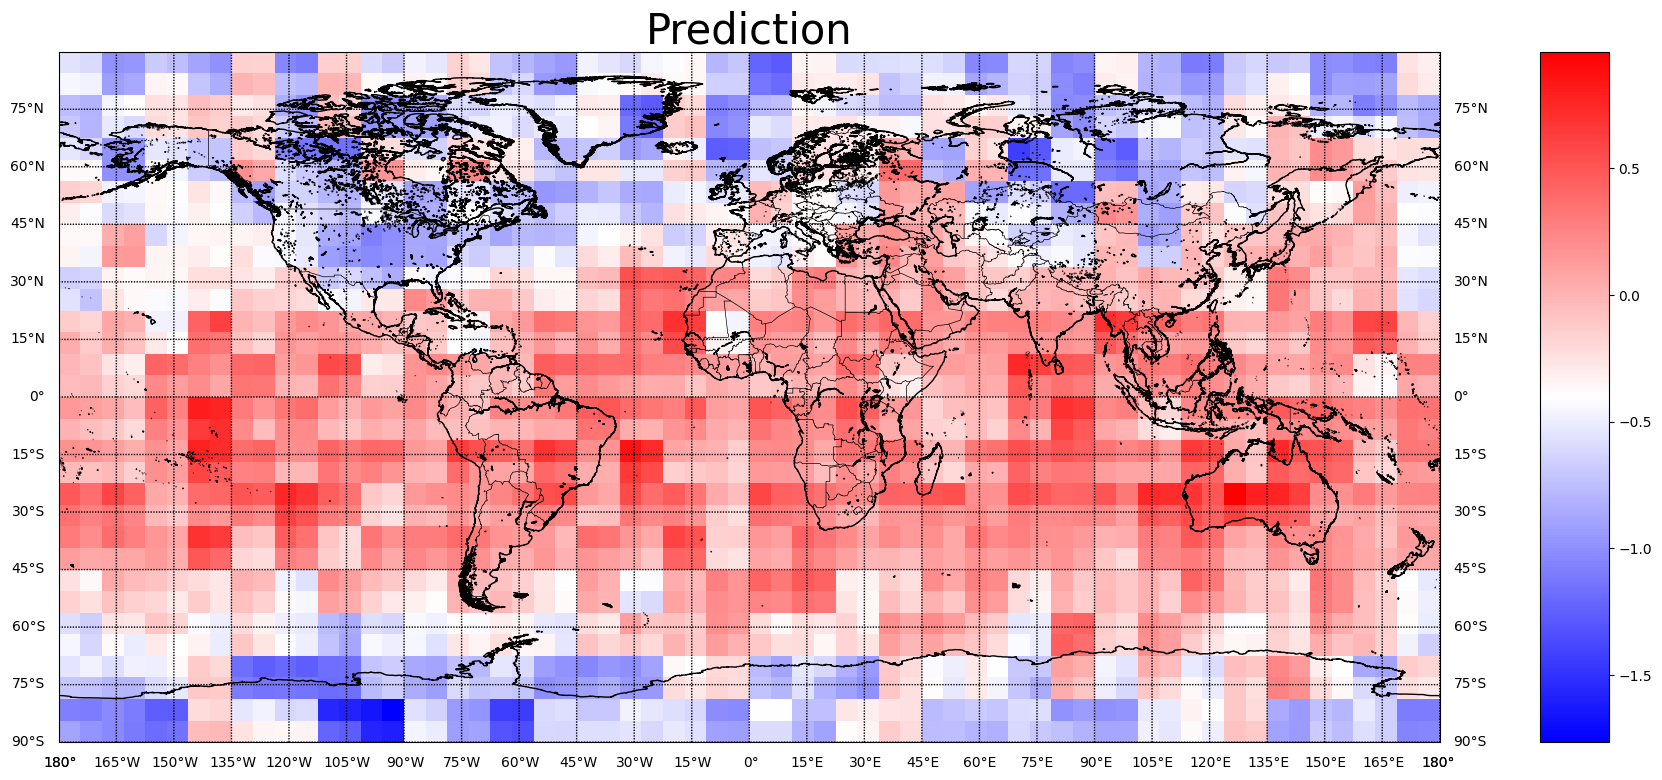

In [23]:
with open(r'/home/advit/aug29_exps2/final_invars_1_hrs_0006.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0, plot_mask=[False, True, False])

(32, 64)
(4, 32, 64)
(32, 64)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature', 'temperature_50', 'temperature_250', 'temperature_500'] ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']                                                         ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.05999999865889549                                                        ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                                                                            ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0                                                      

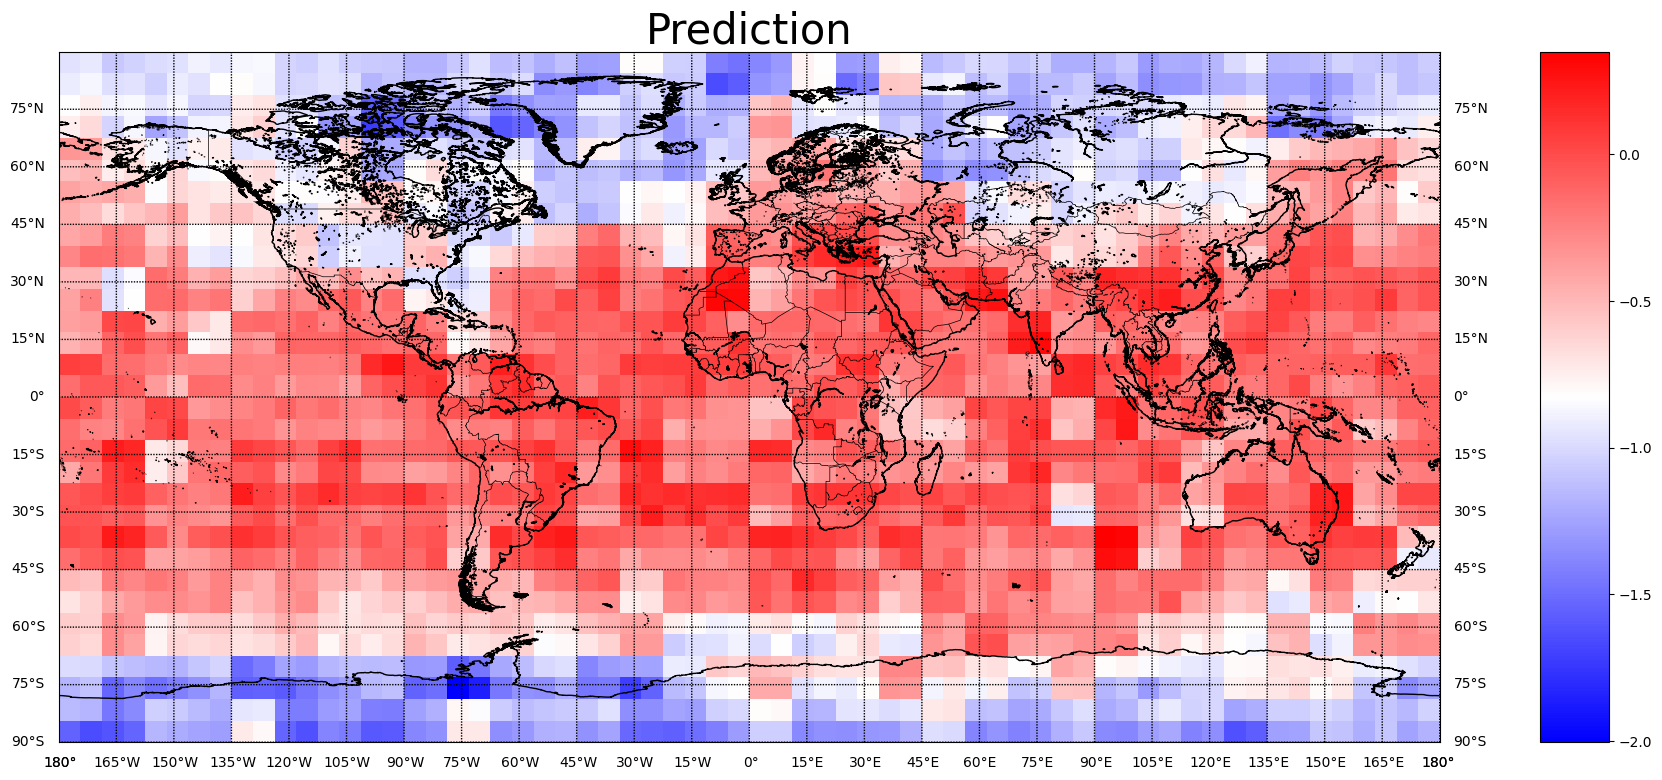

In [24]:
with open(r'/home/advit/aug29_exps2/final_invars_4_hrs_0006.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0, plot_mask=[False, True, False])